<a href="https://colab.research.google.com/github/ProjetsPlusIA/deep-image-prior/blob/master/inpainting_kate_peppers_Final_With_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code for **"Inpainting"** figures $6$, $8$ and 7 (top) from the main paper. 

In [46]:
"""
*Uncomment if running on colab* 
Set Runtime -> Change runtime type -> Under Hardware Accelerator select GPU in Google Colab 
"""
!git clone https://github.com/DmitryUlyanov/deep-image-prior
!mv deep-image-prior/* ./

fatal: destination path 'deep-image-prior' already exists and is not an empty directory.
mv: cannot stat 'deep-image-prior/*': No such file or directory


# Import libs

In [47]:
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import numpy as np
from models.resnet import ResNet
from models.unet import UNet
from models.skip import skip
import torch
import torch.optim

from utils.inpainting_utils import *

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

PLOT = True
imsize = -1
dim_div_by = 64

# Choose figure

In [48]:
## Fig 6
#img_path  = 'data/inpainting/vase.png'
#mask_path = 'data/inpainting/vase_mask.png'

## Fig 8
# img_path  = 'data/inpainting/library.png'
# mask_path = 'data/inpainting/library_mask.png'

## Fig 7 (top)
img_path  = 'data/inpainting/kate.png'
mask_path = 'data/inpainting/kate_mask.png'

# Another text inpainting example
# img_path  = 'data/inpainting/peppers.png'
# mask_path = 'data/inpainting/peppers_mask.png'

NET_TYPE = 'skip_depth6' # one of skip_depth4|skip_depth2|UNET|ResNet

# Load mask

In [49]:
img_pil, img_np = get_image(img_path, imsize)
img_mask_pil, img_mask_np = get_image(mask_path, imsize)



### Center crop

In [50]:
img_mask_pil = crop_image(img_mask_pil, dim_div_by)
img_pil      = crop_image(img_pil,      dim_div_by)

img_np      = pil_to_np(img_pil)
img_mask_np = pil_to_np(img_mask_pil)



### Visualize

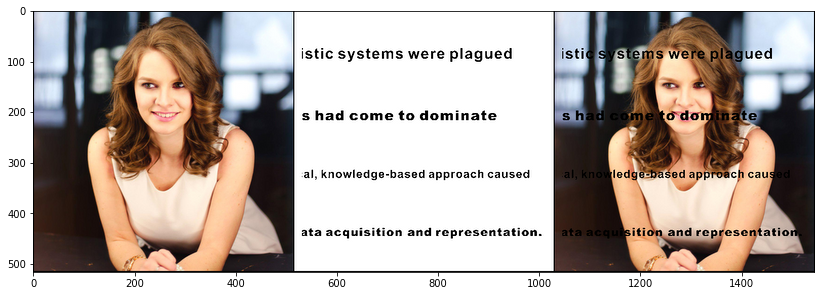

In [51]:
img_mask_var = np_to_torch(img_mask_np).type(dtype)

plot_image_grid([img_np, img_mask_np, img_mask_np*img_np], 3,11);

# Setup

In [52]:
pad = 'reflection' # 'zero'
OPT_OVER = 'net'
OPTIMIZER = 'adam'

In [53]:
# Same params and net as in super-resolution and denoising
INPUT = 'noise'
param_noise = False
show_every = 50
figsize = 5
input_depth = 32

net = skip(input_depth, img_np.shape[0], 
          num_channels_down = [128] * 5,
          num_channels_up =   [128] * 5,
          num_channels_skip =    [128] * 5,  
          filter_size_up = 3, filter_size_down = 3, 
          upsample_mode='nearest', filter_skip_size=1,
          need_sigmoid=True, need_bias=True, pad=pad, act_fun='LeakyReLU').type(dtype)

net = net.type(dtype)
net_input = get_noise(input_depth, INPUT, img_np.shape[1:]).type(dtype)

In [54]:
# Compute number of parameters
s  = sum(np.prod(list(p.size())) for p in net.parameters())
print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_var = np_to_torch(img_np).type(dtype)
mask_var = np_to_torch(img_mask_np).type(dtype)

Number of params: 3002627


In [55]:
import matplotlib.pyplot as plt

def scatter_plot(x,y,param):

  plt.scatter(x,y)

  plt.title('La perte en fonction de ' + param)
  plt.xlabel(param)
  plt.ylabel('La fonction perte (Loss)')
  plt.show()

# Main loop

LR: 0.005000
num_iter: 6001
reg_noise_std: 0.030000
Starting optimization with ADAM
[0.12129800766706467, 0.13042789697647095, 0.10557077825069427, 0.1639690101146698, 0.12079145014286041, 0.09082188457250595, 0.08923159539699554, 0.07526642084121704, 0.05867060273885727, 0.053050171583890915, 0.041891973465681076, 0.03670400381088257, 0.031709324568510056, 0.02975453808903694, 0.030753744766116142, 0.030174583196640015, 0.02824968658387661, 0.02581922709941864, 0.0268247090280056, 0.024996992200613022, 0.022992491722106934, 0.02272852137684822, 0.02109415829181671, 0.021385131403803825, 0.02027592621743679, 0.018970241770148277, 0.020321104675531387, 0.017369326204061508, 0.019313562661409378, 0.01900617405772209, 0.017162635922431946, 0.016001593321561813, 0.01679999753832817, 0.016044635325670242, 0.015133722685277462, 0.015422931872308254, 0.013841615989804268, 0.014140890911221504, 0.013636324554681778, 0.012997368350625038, 0.012628241442143917, 0.011945631355047226, 0.0124334339

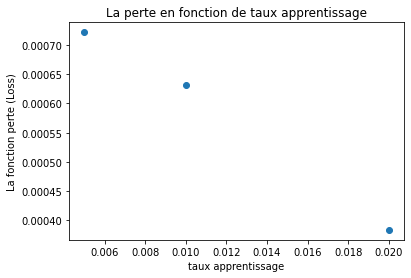

LR: 0.010000
num_iter: 5001
reg_noise_std: 0.030000
Starting optimization with ADAM


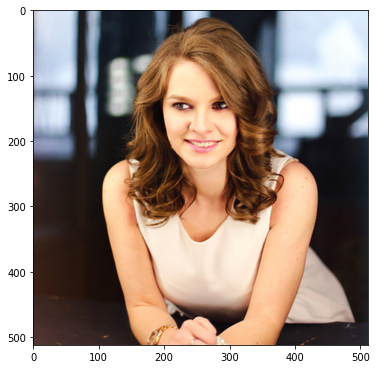

[4.578552761813626e-05, 0.0030429139733314514, 0.0014467313885688782, 0.0012165176449343562, 0.00131762376986444, 0.0010008898098021746, 0.000858140061609447, 0.00068667036248371, 0.000629716319963336, 0.000632219947874546, 0.0006210923893377185, 0.0006002290174365044, 0.0005566817126236856, 0.0005027581937611103, 0.00045004626736044884, 0.0004647747555281967, 0.000444749224698171, 0.0004217622918076813, 0.00038334191776812077, 0.0003608016995713115, 0.00035187246976420283, 0.0003374070511199534, 0.0003183581866323948, 0.0002885407884605229, 0.00027919397689402103, 0.0002697327872738242, 0.00025704040308482945, 0.000258417654549703, 0.00023881913512013853, 0.00022992728918325156, 0.00021942888270132244, 0.00021254426974337548, 0.00020644921460188925, 0.0001946651318576187, 0.00019232332124374807, 0.00018339522648602724, 0.0001790575188351795, 0.00017330239643342793, 0.00017082008707802743, 0.0001632211497053504, 0.00015999544120859355, 0.00015236352919600904, 0.00014630000805482268, 0.

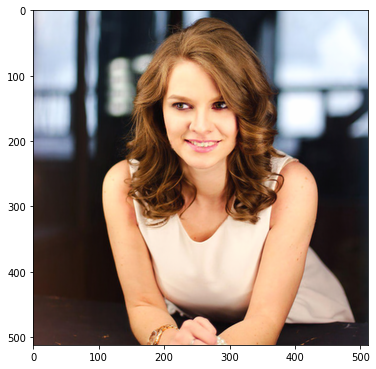

[2.5230698156519793e-05, 0.004164630547165871, 0.000873907411005348, 0.002104732906445861, 0.0010655109072104096, 0.012387057766318321, 0.0014965574955567718, 0.001951298676431179, 0.0028066541999578476, 0.0013002535561099648, 0.0012626384850591421, 0.0011339382035657763, 0.0011713480344042182, 0.0010398989543318748, 0.0010041288333013654, 0.0009935256093740463, 0.0008280742913484573, 0.0008231725078076124, 0.0007965114782564342, 0.0006966653163544834, 0.0006697610369883478, 0.0006645619869232178, 0.000613385287579149, 0.0005839047371409833, 0.0005598531570285559, 0.0005391504964791238, 0.000552308396436274, 0.0004901960492134094, 0.0004850237746722996, 0.00045810043229721487, 0.0004486015532165766, 0.00044924579560756683, 0.00038436352042481303, 0.000357522105332464, 0.0004224653821438551, 0.00036597365397028625, 0.00033322846866212785, 0.00034254833008162677, 0.0003127073578070849, 0.0003080640162806958, 0.0002942044520750642, 0.000285072426777333, 0.00027671363204717636, 0.000264892

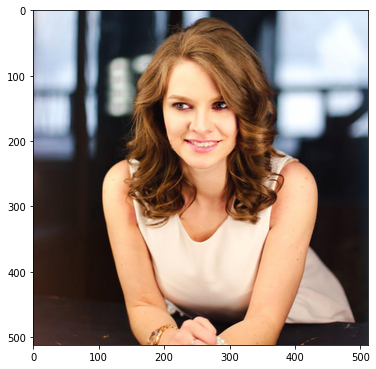

[1.4448427464230917e-05, 0.002351794159039855, 0.00035167051828466356, 0.0010175288189202547, 0.0008806695113889873, 0.000652652932330966, 0.0004736966802738607, 0.0004224994918331504, 0.0004079853533767164, 0.000370425870642066, 0.00034347837208770216, 0.0003160349151585251, 0.00028567900881171227, 0.00026945373974740505, 0.00025597246713005006, 0.00023804946977179497, 0.00022467997041530907, 0.00021206142264418304, 0.00020079004752915353, 0.00018867311882786453, 0.00017690012464299798, 0.00017066896543838084, 0.0001628762693144381, 0.00015459387213923037, 0.00014903678675182164, 0.00014193120296113193, 0.00013432183186523616, 0.00013014214346185327, 0.0001242915604962036, 0.00012188499385956675, 0.00011543588334461674, 0.00011084302968811244, 0.00010652735363692045, 0.00010202842531725764, 9.887239139061421e-05, 9.649938874645159e-05, 9.337101073469967e-05, 9.033668175106868e-05, 8.660867752041668e-05, 8.547060133423656e-05, 8.254811109509319e-05, 8.053202327573672e-05, 7.73342908360

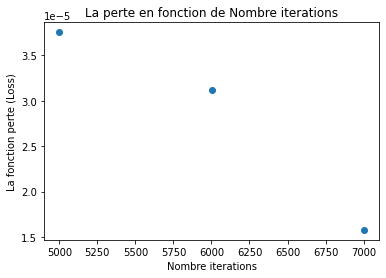

LR: 0.010000
num_iter: 6001
reg_noise_std: 0.020000
Starting optimization with ADAM
[9.492145181866363e-06, 0.0018505742773413658, 0.0002619317965582013, 0.0008780305506661534, 0.0006081182509660721, 0.00043332885252311826, 0.00036041237763129175, 0.0003421303699724376, 0.0002997538831550628, 0.00028660078532993793, 0.0002654445997904986, 0.0002310074050910771, 0.0002162035962101072, 0.00020258870790712535, 0.0001848698448156938, 0.00017019594088196754, 0.00016117497580125928, 0.00015003883163444698, 0.00013771837984677404, 0.00013100140495225787, 0.0001249937922693789, 0.0001165342255262658, 0.00010901447967626154, 0.00010346290946472436, 9.87485982477665e-05, 9.402935393154621e-05, 8.851588791003451e-05, 8.453046757495031e-05, 8.084537694230676e-05, 7.672785432077944e-05, 7.394816202577204e-05, 7.10662134224549e-05, 6.758069503121078e-05, 6.417800614144653e-05, 6.125542131485417e-05, 5.907719605602324e-05, 5.699611210729927e-05, 5.515887096407823e-05, 5.36283987457864e-05, 5.10462996

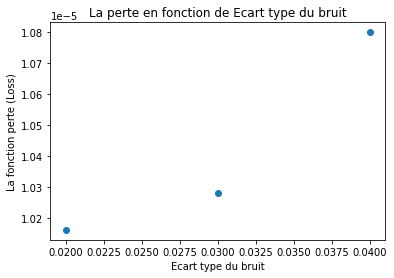

In [56]:
import numpy as np
default_LR = 0.01 
default_num_iter = 6001
default_reg_noise_std = 0.03

i = 0
loss_storage = []
net_input_saved = None
noise = None
reg_noise_std = None
num_iter = 0

def closure():   
    global i
    global loss_storage
    global net_input_saved
    global noise
    global reg_noise_std

    if param_noise:
        for n in [x for x in net.parameters() if len(x.size()) == 4]:
            n = n + n.detach().clone().normal_() * n.std() / 50
    
    net_input = net_input_saved
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std)
        
        
    out = net(net_input)
   
    total_loss = mse(out * mask_var, img_var * mask_var)
    loss_storage.append(total_loss.item())
    total_loss.backward()
    print ('Iteration %05d    Loss %f' % (i, total_loss.item()), '\r', end='')
      
    if PLOT and i == (num_iter - 1):
        out_np = torch_to_np(out)
        plot_image_grid([np.clip(out_np, 0, 1)], factor=figsize, nrow=1)
        
    i += 1
    return total_loss

def main_loop(LR_param, num_iter_param, reg_noise_std_param):
  global i
  global loss_storage
  global net_input_saved
  global noise
  global reg_noise_std

  LR = LR_param
  num_iter = num_iter_param
  reg_noise_std = reg_noise_std_param

  print ('LR: %f' % LR)
  print ('num_iter: %d' % num_iter)
  print ('reg_noise_std: %f' % reg_noise_std)

  loss_storage = []
  i = 0
  net_input_saved = net_input.detach().clone()
  noise = net_input.detach().clone()
  p = get_params(OPT_OVER, net, net_input)
  optimize(OPTIMIZER, p, closure, LR, num_iter)
  print(loss_storage)

  return np.mean(loss_storage)

LR_values = [0.005, 0.01, 0.02]
num_iter_values = [5001, 6001, 7001]
reg_noise_std_values = [0.02, 0.03, 0.04]

loss_means = []
for LR in LR_values:
  loss_means.append(main_loop(LR, default_num_iter, default_reg_noise_std))

scatter_plot(LR_values,loss_means,'taux apprentissage')

loss_means = []  
for num_iter in num_iter_values:
  loss_means.append(main_loop(default_LR, num_iter, default_reg_noise_std))

scatter_plot(num_iter_values,loss_means,'Nombre iterations')

loss_means = []
for reg_noise_std in reg_noise_std_values:
  loss_means.append(main_loop(default_LR, default_num_iter, reg_noise_std))

scatter_plot(reg_noise_std_values,loss_means,'Ecart type du bruit')

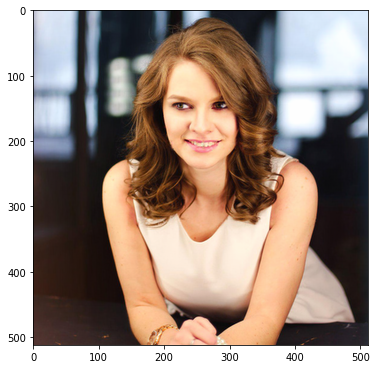

In [57]:
out_np = torch_to_np(net(net_input))
plot_image_grid([out_np], factor=5);